# AutoQML for Tabular Data
- Altares-López, S., Ribeiro, A., & García-Ripoll, J. J. (2021). Automatic design of quantum feature maps. Quantum Science and Technology, 6(4), 045015.
- Altares-López, S., García-Ripoll, J. J., & Ribeiro, A. (2024). AutoQML: Automatic generation and training of robust quantum-inspired classifiers by using evolutionary algorithms on grayscale images. Expert Systems with Applications, 244, 122984.
- Altares-López, S., García-Ripoll, J. J., & Ribeiro, A. (2024). Optimal quantum circuit generation for pixel segmentation in multiband images. Applied Soft Computing, 166, 112175.

In [1]:
#Math Part
import numpy as np
import pandas as pd

#Graph
import matplotlib.pyplot as plt

import importlib
import circuit
import encoding
import qsvm
import fitness
import gsvm
importlib.reload(circuit)
importlib.reload(encoding)
importlib.reload(qsvm)
importlib.reload(fitness)
importlib.reload(gsvm)

import pandas as pd
import time

def evol(output="sample_iot_result_n5.csv"):
    iot_data = pd.read_csv('sample_iot_data.csv')
    y = iot_data['pump'].values
    X = iot_data[['moisture','temp']].values
    start = time.time()
    pop, pareto, logbook = gsvm.gsvm(nqubits=6, depth=6, nparameters=2,
                                     X=X, y=y, weights=[-1.0,1.0],
                                     mu=4,lambda_=2, ngen=1)
    print(f'Simulation finished after {time.time()-start} seconds')
    print(f'\nGenetic-algorithm output ({output})')
    #print('generation, individual, gates/qubit, accuracy')
    print('---------------------------------------------')
    with open(output, "w") as f:
        for ide, ind in enumerate(pareto):
            genes=''.join(str(i) for i in list(ind))
            gates, acc = ind.fitness.values
            line = f'{ide},"{genes}",{gates},{acc}'
            f.write(line)
            f.write('\n')
            print(line)
evol()

multi
gen	nevals	media 	std   	max  	min 
0  	4     	0.9625	0.0125	0.975	0.95
1  	2     	0.96875	0.0108253	0.975	0.95
Simulation finished after 0.18962597846984863 seconds

Genetic-algorithm output (sample_iot_result_n5.csv)
---------------------------------------------
0,"011101010011100010101101101100111001100001011111111010001010011110011100111110010110101100111000111010101001101111111011010100101011000000000101111111100011111001110001111000011110",8.452708333333334,0.975


In [2]:
import encoding_2 as e2
import random
iot_result = pd.read_csv('sample_iot_result_n5.csv',header=None)

def ordenar_salidas_pareto(dataframe):
    dataframe.columns=['ind','circ','gates','acc']
    dataframe.sort_values(['acc','gates'], ascending=[False,False],inplace=True)
    dataframe.reset_index(inplace=True)
    dataframe.pop('index')
    return dataframe

iot_salidas = ordenar_salidas_pareto(iot_result)
iot_salidas # Queremos ver el primer circuito del dataframe yya ordenado por accuracy (mejor ind)

,ind,circ,gates,acc
0,0,0111010100111000101011011011001110011000010111...,8.452708,0.975


['01110', '10100', '11100', '01010', '11011', '01100', '11100', '11000', '01011', '11111', '10100', '01010', '01111', '00111', '00111', '11001', '01101', '01100', '11100', '01110', '10101', '00110', '11111', '11011', '01010', '01010', '11000', '00000', '01011', '11111', '10001', '11110', '01110', '00111', '10000', '11110']
26.0


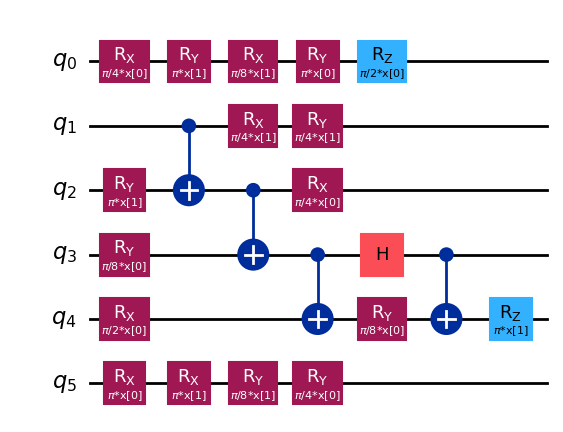

In [3]:
cc = e2.CircuitConversor(nqubits=6, nparameters=2)
fm, puertas = cc(e2. coding_bits(iot_salidas.circ[0]))
print(puertas)
fm.draw(output='mpl')

# More Generations, More evolutions

In [4]:
def evol(output="sample_iot_result_n6_50.csv"):
    iot_data = pd.read_csv('sample_iot_data.csv')
    y = iot_data['pump'].values
    X = iot_data[['moisture','temp']].values
    start = time.time()
    pop, pareto, logbook = gsvm.gsvm(nqubits=6, depth=6, nparameters=2,
                                     X=X, y=y, weights=[-1.0,1.0],
                                     mu=4,lambda_=2, ngen=50)
    print(f'Simulation finished after {time.time()-start} seconds')
    print(f'\nGenetic-algorithm output ({output})')
    #print('generation, individual, gates/qubit, accuracy')
    print('---------------------------------------------')
    with open(output, "w") as f:
        for ide, ind in enumerate(pareto):
            genes=''.join(str(i) for i in list(ind))
            gates, acc = ind.fitness.values
            line = f'{ide},"{genes}",{gates},{acc}'
            f.write(line)
            f.write('\n')
            print(line)
evol()

multi
gen	nevals	media  	std      	max 	min
0  	4     	0.93125	0.0207289	0.95	0.9
1  	2     	0.9375 	0.0125   	0.95	0.925


C:\Users\sergi\miniconda3\envs\pennylane_env\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\sergi\miniconda3\envs\pennylane_env\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


2  	2     	0.95   	0.0176777	0.975	0.925
3  	2     	0.95   	0.0176777	0.975	0.925
4  	2     	0.95   	0.0176777	0.975	0.925
5  	2     	0.95   	0.0176777	0.975	0.925
6  	2     	0.95625	0.0207289	0.975	0.925
7  	2     	0.95625	0.0207289	0.975	0.925
8  	2     	0.95625	0.0207289	0.975	0.925
9  	2     	0.95625	0.0207289	0.975	0.925
10 	2     	0.95625	0.0207289	0.975	0.925
11 	2     	0.95625	0.0207289	0.975	0.925
12 	2     	0.93125	0.0757772	0.975	0.8  
13 	2     	0.93125	0.0757772	0.975	0.8  
14 	2     	0.96875	0.0108253	0.975	0.95 
15 	2     	0.96875	0.0108253	0.975	0.95 
16 	2     	0.96875	0.0108253	0.975	0.95 
17 	2     	0.96875	0.0108253	0.975	0.95 
18 	2     	0.96875	0.0108253	0.975	0.95 
19 	2     	0.96875	0.0108253	0.975	0.95 
20 	2     	0.9625 	0.0125   	0.975	0.95 
21 	2     	0.9625 	0.0125   	0.975	0.95 
22 	2     	0.9625 	0.0125   	0.975	0.95 
23 	2     	0.9625 	0.0125   	0.975	0.95 
24 	2     	0.9625 	0.0125   	0.975	0.95 
25 	2     	0.9625 	0.0125   	0.975	0.95 
26 	2     	0.956

In [5]:
import encoding_2 as e2
import random
iot_result = pd.read_csv('sample_iot_result_n6_50.csv',header=None)

def ordenar_salidas_pareto(dataframe):
    dataframe.columns=['ind','circ','gates','acc']
    dataframe.sort_values(['acc','gates'], ascending=[False,False],inplace=True)
    dataframe.reset_index(inplace=True)
    dataframe.pop('index')
    return dataframe

iot_salidas = ordenar_salidas_pareto(iot_result)
iot_salidas # Queremos ver el primer circuito del dataframe yya ordenado por accuracy (mejor ind)

,ind,circ,gates,acc
0,1,1000110101000000101011011010001010000010010000...,5.201667,0.975
1,0,1000110101000000101011011010001010000010010000...,4.122083,0.950


['10001', '10101', '00000', '01010', '11011', '01000', '10100', '00010', '01000', '00011', '10010', '01010', '10011', '01011', '01001', '10100', '00011', '01011', '01110', '01111', '10110', '10110', '11111', '01011', '10001', '10000', '01000', '11100', '01001', '00011', '11010', '10110', '10100', '10100', '00101', '10100']
16.0


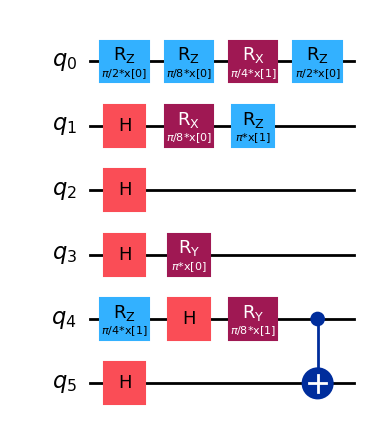

In [6]:
cc = e2.CircuitConversor(nqubits=6, nparameters=2)
fm, puertas = cc(e2. coding_bits(iot_salidas.circ[0]))
print(puertas)
fm.draw(output='mpl')

# High Expressivity and Less complexity

In [7]:
def evol(output="sample_iot_result_n6_500.csv"):
    iot_data = pd.read_csv('sample_iot_data.csv')
    y = iot_data['pump'].values
    X = iot_data[['moisture','temp']].values
    start = time.time()
    pop, pareto, logbook = gsvm.gsvm(nqubits=6, depth=6, nparameters=2,
                                     X=X, y=y, weights=[-1.0,1.0],
                                     mu=4,lambda_=2, ngen=500)
    print(f'Simulation finished after {time.time()-start} seconds')
    print(f'\nGenetic-algorithm output ({output})')
    #print('generation, individual, gates/qubit, accuracy')
    print('---------------------------------------------')
    with open(output, "w") as f:
        for ide, ind in enumerate(pareto):
            genes=''.join(str(i) for i in list(ind))
            gates, acc = ind.fitness.values
            line = f'{ide},"{genes}",{gates},{acc}'
            f.write(line)
            f.write('\n')
            print(line)
evol()

multi
gen	nevals	media  	std      	max  	min  
0  	4     	0.94375	0.0207289	0.975	0.925
1  	2     	0.925  	0.0467707	0.975	0.85 


C:\Users\sergi\miniconda3\envs\pennylane_env\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\sergi\miniconda3\envs\pennylane_env\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


2  	2     	0.93125	0.0511585	0.975	0.85 
3  	2     	0.925  	0.0612372	0.975	0.825
4  	2     	0.9375 	0.0414578	0.975	0.875
5  	2     	0.9375 	0.0414578	0.975	0.875
6  	2     	0.9375 	0.0414578	0.975	0.875
7  	2     	0.93125	0.0369755	0.975	0.875
8  	2     	0.93125	0.0369755	0.975	0.875
9  	2     	0.9375 	0.0375   	0.975	0.875
10 	2     	0.94375	0.0272431	0.975	0.9  
11 	2     	0.94375	0.0272431	0.975	0.9  
12 	2     	0.95   	0.0306186	0.975	0.9  
13 	2     	0.95   	0.0306186	0.975	0.9  
14 	2     	0.9625 	0.0125   	0.975	0.95 
15 	2     	0.925  	0.0586302	0.975	0.825
16 	2     	0.93125	0.0621867	0.975	0.825
17 	2     	0.93125	0.0621867	0.975	0.825
18 	2     	0.9375 	0.0673146	1    	0.825
19 	2     	0.9375 	0.0673146	1    	0.825
20 	2     	0.9375 	0.0673146	1    	0.825
21 	2     	0.90625	0.0817294	1    	0.825
22 	2     	0.90625	0.0817294	1    	0.825
23 	2     	0.9375 	0.0673146	1    	0.825
24 	2     	0.9375 	0.0673146	1    	0.825
25 	2     	0.95   	0.0467707	1    	0.875
26 	2     	0.956

,ind,circ,gates,acc
0,6,0101111010000111011110001100111010010011110101...,5.333333,1.000
1,7,0101111010000111011110001100111010011011111101...,5.333333,1.000
2,8,0101111010000111011110001100111010011011111101...,5.333333,1.000
3,9,0101111010000111011110001100111010011011111101...,5.333333,1.000
4,10,0101111010000111011110001100111010010011110101...,5.333333,1.000
5,11,0101111010000111011110001100111010010011110101...,5.333333,1.000
6,12,0101111010000111011110001100111010010011110101...,5.333333,1.000
7,13,0101111010000111011110001100111010010011110101...,5.333333,1.000
8,14,0101111010000111011110001100111010010011110101...,5.333333,1.000
9,15,0101111010000111011110001100111010010011110101...,5.333333,1.000


['01011', '11010', '00011', '10111', '10001', '10011', '10100', '10011', '11010', '11110', '10001', '10101', '11000', '10100', '00000', '11000', '01111', '10111', '10110', '10000', '01101', '01011', '01000', '01000', '01010', '01100', '10011', '10001', '11000', '01111', '11000', '01011', '10111', '01010', '00010', '01101']
16.0


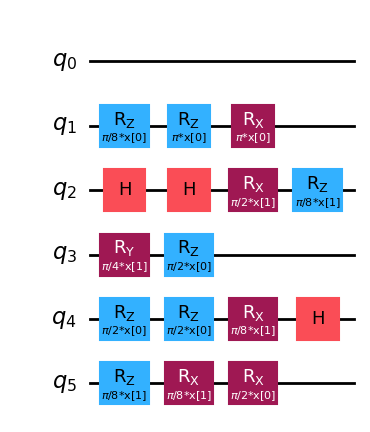

In [8]:
import encoding_2 as e2
import random
iot_result = pd.read_csv('sample_iot_result_n6_500.csv',header=None)

def ordenar_salidas_pareto(dataframe):
    dataframe.columns=['ind','circ','gates','acc']
    dataframe.sort_values(['acc','gates'], ascending=[False,False],inplace=True)
    dataframe.reset_index(inplace=True)
    dataframe.pop('index')
    return dataframe

iot_salidas = ordenar_salidas_pareto(iot_result)
display(iot_salidas)

cc = e2.CircuitConversor(nqubits=6, nparameters=2)
fm, puertas = cc(e2. coding_bits(iot_salidas.circ[0]))
print(puertas)
fm.draw(output='mpl')